<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Loan_Default_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predict if customers will default or pay off their loans.  

In [2]:
# Import the software libraries.
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
%matplotlib inline

The data set for this project can be found on Github at this location:
https://datascienceuwl.github.io/Project2018/loans50k.csv

In [3]:
# Load the data into Google Colab. 
from google.colab import files  
uploaded = files.upload() 

Saving loans50k.csv to loans50k.csv


In [4]:
# Store the data into a data frame.
loans = pd.read_csv('loans50k.csv',  encoding = 'latin-1')

In [5]:
# Data analysis and exploration. 
# Print the first 5 rows
loans.head(5) 

,loanID,amount,term,rate,payment,grade,employment,length,home,income,verified,status,reason,state,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalPaid,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,188861,8000.0,36 months,0.14,272.07,C,Warehouseman,3 years,RENT,49966.0,Source Verified,Charged Off,credit_card,CA,30.05,0.0,0.0,11.0,0.0,0.55,15.0,5914.67000,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,517703,11000.0,36 months,0.10,354.89,B,Vice President,10+ years,MORTGAGE,50000.0,Not Verified,Fully Paid,debt_consolidation,PA,8.74,0.0,2.0,12.0,0.0,0.36,15.0,12024.75000,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,268587,35000.0,36 months,0.15,1220.33,D,Owner/Attorney,10+ years,RENT,360000.0,Verified,Current,debt_consolidation,CA,14.50,0.0,1.0,8.0,0.0,0.83,14.0,31668.65000,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,579902,20000.0,60 months,0.12,447.83,C,Analyst,2 years,MORTGAGE,60000.0,Source Verified,Fully Paid,debt_consolidation,CA,14.14,0.0,0.0,12.0,3.0,0.01,48.0,23827.22901,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,617630,12000.0,60 months,0.12,266.88,B,medical technician,10+ years,MORTGAGE,64000.0,Source Verified,Current,debt_consolidation,NJ,5.14,0.0,0.0,8.0,0.0,0.58,22.0,9599.69000,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


The data set contains information about customers who have fully paid off their loans, current on their payments, in grace period, late , and in collection. Definitions for the data variables are shown below.   

   **Variable	  /   Description**
*  amount -	    loan amount in dollars
*  term   -	      loan term is 36 or 60 months
*  rate	  -    interest rate as a decimal
*  payment -	  monthly payment amount
*  grade	 -   grade of loan: A is least risk, G is most risk
*  employment -	job title of applicant


* length -	time continuously employed
* home -	home ownership: rent, own, mortgage
* income -	annual income in dollars
* verified -	verification status of annual income
* status -	loan status: DEFAULT, CURRENT, CHARGED OFF, etc.
* reason -	applicants purpose for the loan
* state -	two letter state code of applicant
* debtIncRat -	ratio monthly non-mortgage debt payment to monthly income
* delinq2yr -	number of 30+ day late payments in last two years
* inq6mth -	number of credit checks in the past 6 months
* openAcc -	number of open credit lines
* pubRec -	number of derogatory public records including bankruptcy filings, tax liens, etc.
* revolRatio -	proportion of revoling credit in use
* totalAcc -	total number of credit lines in file (both open & closed accounts)
* totalPaid -	total amount repaid to bank (THIS IS NOT A PREDICTOR SINCE IT CAN ONLY BE DETERMINED AFTER A LOAN IS ISSUED)
* totalBal -	total current balance of all credit accounts
* totalRevLim -	sum of credit limits from all credit lines
* accOpen24 -	how many accounts were opened in the past 24 months
* avgBal -	average balance per account
* bcOpen -	total unused credit on credit cards
* bcRatio -	ratio of total credit card balance to total credit card lmits
* totalLim -	total credit limits
* totalRevBal -	total credit balance except mortgages
* totalBcLim -	total credit limits of credit cards
* totalIlLim -	total of credit limits for installment accounts 

In [6]:
# Show information about the dataframe.
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       50000 non-null  int64  
 1   amount       49999 non-null  float64
 2   term         49999 non-null  object 
 3   rate         49999 non-null  float64
 4   payment      49999 non-null  float64
 5   grade        49999 non-null  object 
 6   employment   47215 non-null  object 
 7   length       47319 non-null  object 
 8   home         49999 non-null  object 
 9   income       49999 non-null  float64
 10  verified     49999 non-null  object 
 11  status       49999 non-null  object 
 12  reason       49999 non-null  object 
 13  state        49999 non-null  object 
 14  debtIncRat   49999 non-null  float64
 15  delinq2yr    49999 non-null  float64
 16  inq6mth      49999 non-null  float64
 17  openAcc      49999 non-null  float64
 18  pubRec       49999 non-null  float64
 19  revo

There are 50,000 loan records and 32 features. The data set contains numeric and categorical variables with some missing values. The loan status feature will be the target variable.

In [7]:
# Check for NA or missing values in features.
loans.isna().sum()

loanID            0
amount            1
term              1
rate              1
payment           1
grade             1
employment     2785
length         2681
home              1
income            1
verified          1
status            1
reason            1
state             1
debtIncRat        1
delinq2yr         1
inq6mth           1
openAcc           1
pubRec            1
revolRatio       19
totalAcc          1
totalPaid         1
totalBal          1
totalRevLim       1
accOpen24         1
avgBal            1
bcOpen          489
bcRatio         521
totalLim          1
totalRevBal       1
totalBcLim        1
totalIlLim        1
dtype: int64

We need to evaluate features with null or missing values and decide how they will be handled. 

In [8]:
# Find boolean values (true/false) for all features.  
loans_missing = loans.isna()
loans_missing.head()

,loanID,amount,term,rate,payment,grade,employment,length,home,income,verified,status,reason,state,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalPaid,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Sum the boolean values for each feature. This shows the number of null values for each feature.
>>> loans_num_missing = loans_missing.sum()
>>> loans_num_missing

loanID            0
amount            1
term              1
rate              1
payment           1
grade             1
employment     2785
length         2681
home              1
income            1
verified          1
status            1
reason            1
state             1
debtIncRat        1
delinq2yr         1
inq6mth           1
openAcc           1
pubRec            1
revolRatio       19
totalAcc          1
totalPaid         1
totalBal          1
totalRevLim       1
accOpen24         1
avgBal            1
bcOpen          489
bcRatio         521
totalLim          1
totalRevBal       1
totalBcLim        1
totalIlLim        1
dtype: int64

In [10]:
# Find the percentage of missing values for each feature.
len(loans)
loans_num_missing / len(loans) * 100

loanID         0.000
amount         0.002
term           0.002
rate           0.002
payment        0.002
grade          0.002
employment     5.570
length         5.362
home           0.002
income         0.002
verified       0.002
status         0.002
reason         0.002
state          0.002
debtIncRat     0.002
delinq2yr      0.002
inq6mth        0.002
openAcc        0.002
pubRec         0.002
revolRatio     0.038
totalAcc       0.002
totalPaid      0.002
totalBal       0.002
totalRevLim    0.002
accOpen24      0.002
avgBal         0.002
bcOpen         0.978
bcRatio        1.042
totalLim       0.002
totalRevBal    0.002
totalBcLim     0.002
totalIlLim     0.002
dtype: float64

We see that most of the variables are missing around 0.002% of data except employment at 5.570%, length (time continuously employed) at 5.362%, revolRatio (proportion of revoling credit in use) at 0.038%, bcOpen(total unused credit on credit cards) at 0.978% and bcRatio (ratio of total credit card balance to total credit card limits) at 1.042%.

For this analysis we will drop rows with missing values because they were only about 1% missing of all the loan records.

In [11]:
# Drop the rows where at least one element has missing values.
loans = loans.dropna()

Some of the features are not needed for identifying loans as good or bad loans. These features include state, loan ID and verified. Employment feature will not be used because it has too many categorical values that are not specific to the type of employment. TotalPaid will not be used because it can only be determined after a loan is issued.   


In [12]:
# Drop columns not needed for analysis.
cols = ['state','loanID', 'verified', 'employment', 'totalPaid']         
loans = loans.drop(columns = cols, axis = 1)                                                                                                                     

Loan records with status of "Current" will not be considered for modeling because these are loans where the customer is still making payments within a specific time frame and we do not know if they will pay the loan off or default.

In [13]:
# Drop loans where status is "Current". 
# Get names of indexes where status column has value of "Current"
indexNames = loans[loans['status'] == 'Current'].index
# Delete these row indexes from the dataframe.
loans.drop(indexNames , inplace=True)
loans.shape

(33126, 27)

The loan status variable contains multiple categories. We will change status to have two categories: a good loan will be "Fully Paid", "In Grace Period" or "Late (16-30 days)" and a bad loan will be "Charged Off", "Default" or "Late (31-120 days)". 

In [14]:
# Consolidate values in the status variable.                      
loans['status'] = loans['status'].replace(['Fully Paid', 'In Grace Period', 'Late (16-30 days)'], 'Good')
loans['status'] = loans['status'].replace(['Charged Off', 'Default', 'Late (31-120 days)' ], 'Bad')
loans.head()

,amount,term,rate,payment,grade,length,home,income,status,reason,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,8000.0,36 months,0.14,272.07,C,3 years,RENT,49966.0,Bad,credit_card,30.05,0.0,0.0,11.0,0.0,0.55,15.0,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,11000.0,36 months,0.10,354.89,B,10+ years,MORTGAGE,50000.0,Good,debt_consolidation,8.74,0.0,2.0,12.0,0.0,0.36,15.0,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
3,20000.0,60 months,0.12,447.83,C,2 years,MORTGAGE,60000.0,Good,debt_consolidation,14.14,0.0,0.0,12.0,3.0,0.01,48.0,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
5,10000.0,36 months,0.14,340.13,C,< 1 year,RENT,108000.0,Bad,credit_card,11.70,0.0,2.0,25.0,0.0,0.41,44.0,25139.0,57100.0,8.0,1093.0,4129.0,77.8,70672.0,25139.0,18600.0,13572.0
6,20000.0,60 months,0.13,458.45,C,9 years,RENT,40000.0,Good,credit_card,23.10,0.0,0.0,13.0,0.0,0.88,31.0,79696.0,20000.0,2.0,6130.0,957.0,94.8,93909.0,79696.0,18500.0,73909.0


The length of employment contains numerous categories. We will reduce the number of categories for this variable.

In [15]:
# Consolidate values in the length variable.                   
loans['length'] = loans['length'].replace(['1 year', '1 years', '2 years', '3 years'], '1-3 years')
loans['length'] = loans['length'].replace(['4 years', '5 years', '6 years'], '4-6 years')
loans['length'] = loans['length'].replace(['7 years', '8 years', '9 years'], '7-9 years')
loans.head(5)

,amount,term,rate,payment,grade,length,home,income,status,reason,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,8000.0,36 months,0.14,272.07,C,1-3 years,RENT,49966.0,Bad,credit_card,30.05,0.0,0.0,11.0,0.0,0.55,15.0,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,11000.0,36 months,0.10,354.89,B,10+ years,MORTGAGE,50000.0,Good,debt_consolidation,8.74,0.0,2.0,12.0,0.0,0.36,15.0,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
3,20000.0,60 months,0.12,447.83,C,1-3 years,MORTGAGE,60000.0,Good,debt_consolidation,14.14,0.0,0.0,12.0,3.0,0.01,48.0,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
5,10000.0,36 months,0.14,340.13,C,< 1 year,RENT,108000.0,Bad,credit_card,11.70,0.0,2.0,25.0,0.0,0.41,44.0,25139.0,57100.0,8.0,1093.0,4129.0,77.8,70672.0,25139.0,18600.0,13572.0
6,20000.0,60 months,0.13,458.45,C,7-9 years,RENT,40000.0,Good,credit_card,23.10,0.0,0.0,13.0,0.0,0.88,31.0,79696.0,20000.0,2.0,6130.0,957.0,94.8,93909.0,79696.0,18500.0,73909.0


The reason for loan contains numerous categories. We will reduce the number of categories for this variable.

In [16]:
# Consolidate values in the reason variable.                      
loans['reason'] = loans['reason'].replace(['car'], 'major_purchase')
loans['reason'] = loans['reason'].replace(['renewable_energy'], 'home_improvement')
loans['reason'] = loans['reason'].replace(['vacation', 'medical', 'moving', 'wedding'], 'other')
loans.head(5)

,amount,term,rate,payment,grade,length,home,income,status,reason,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,8000.0,36 months,0.14,272.07,C,1-3 years,RENT,49966.0,Bad,credit_card,30.05,0.0,0.0,11.0,0.0,0.55,15.0,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,11000.0,36 months,0.10,354.89,B,10+ years,MORTGAGE,50000.0,Good,debt_consolidation,8.74,0.0,2.0,12.0,0.0,0.36,15.0,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
3,20000.0,60 months,0.12,447.83,C,1-3 years,MORTGAGE,60000.0,Good,debt_consolidation,14.14,0.0,0.0,12.0,3.0,0.01,48.0,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
5,10000.0,36 months,0.14,340.13,C,< 1 year,RENT,108000.0,Bad,credit_card,11.70,0.0,2.0,25.0,0.0,0.41,44.0,25139.0,57100.0,8.0,1093.0,4129.0,77.8,70672.0,25139.0,18600.0,13572.0
6,20000.0,60 months,0.13,458.45,C,7-9 years,RENT,40000.0,Good,credit_card,23.10,0.0,0.0,13.0,0.0,0.88,31.0,79696.0,20000.0,2.0,6130.0,957.0,94.8,93909.0,79696.0,18500.0,73909.0


In [17]:
# Show the number of bad and good loans.
loans['status'].value_counts()

Good    25747
Bad      7379
Name: status, dtype: int64

Our data set is imbalanced as we have far more “Good” loans than “Bad” loans. There were 25,747 good loans and 7,379 bad loans. 

In [18]:
# Show percentages for Good and Bad loans. 
good = loans[loans.status == 'Good']
bad = loans[loans.status == 'Bad']
num_good = good.shape[0]
num_bad = bad.shape[0]

# Print the percentage of loans that went bad.  
print(num_good / (num_good + num_bad) * 100 , "% of loans that were good for the bank.")

# Print the percentage of loans that were good. 
print(num_bad / (num_good + num_bad) * 100,"% of loans that went bad for the bank.")

77.72444605445872 % of loans that were good for the bank.
22.275553945541265 % of loans that went bad for the bank.


We find that 77.72% of the loans were good and 22.28% of the loans went bad.

---



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f185abd9dd0>],
      dtype=object)

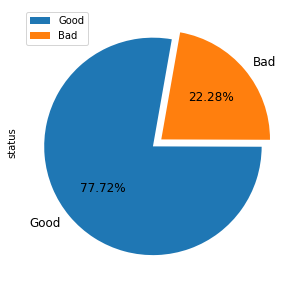

In [19]:
# Visualize the counts for good and bad loans.  
loans.status.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True,
                                 fontsize=12, figsize=(8,5), textprops={'color':"black"})

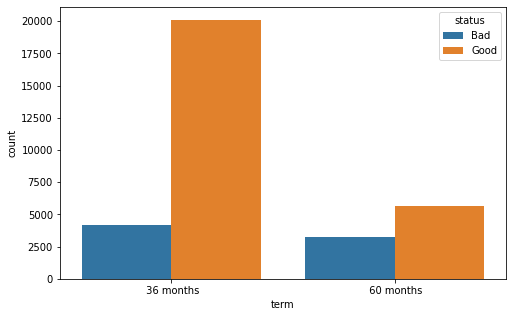

In [20]:
# Visualize the status counts for term of loan.
plt.figure(figsize=(8, 5))
sns.countplot(x='term', hue='status', data = loans)

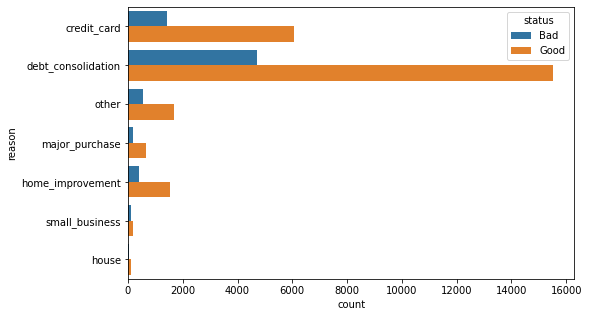

In [21]:
# Visualize the status counts for purpose of loan.
plt.figure(figsize=(8, 5))
sns.countplot(y='reason', hue='status', data = loans)

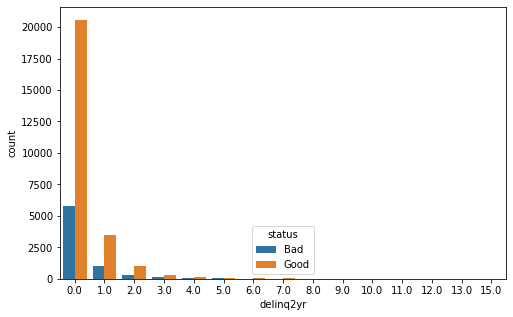

In [22]:
# Visualize the status counts for number of 30+ day late payments in last two years.
plt.figure(figsize=(8, 5))
sns.countplot(x='delinq2yr', hue='status', data = loans)

<Figure size 576x360 with 0 Axes>

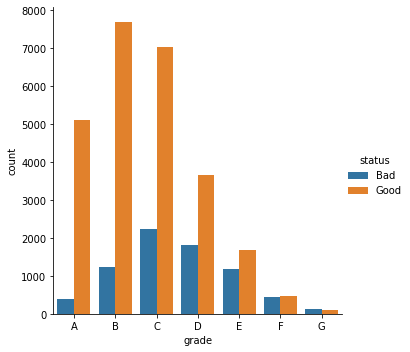

In [23]:
# Visualize the status counts for each grade (A is least risk, G is most risk).
plt.figure(figsize=(8, 5))
category_order = ['A',
                  'B', 
                  'C', 
                  'D', 
                  'E', 
                  'F', 
                  'G']
sns.catplot(x='grade', 
              data = loans, 
              hue='status',
              kind = 'count',
              order= category_order)


<Figure size 576x360 with 0 Axes>

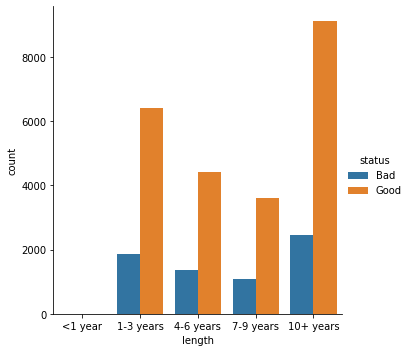

In [24]:
# Visualize the status counts for length of employment.
plt.figure(figsize=(8, 5))
category_order = ['<1 year',
                  '1-3 years', 
                  '4-6 years', 
                  '7-9 years', 
                  '10+ years'] 
                  
sns.catplot(x='length', 
              data = loans, 
              hue ='status', 
              kind = 'count', 
              order = category_order)

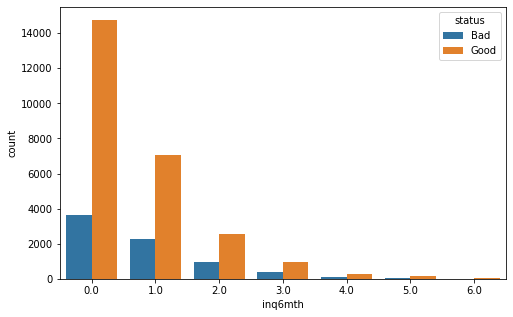

In [25]:
# Visualize the status counts for number of credit checks in the past 6 months.
plt.figure(figsize=(8, 5))
sns.countplot(x='inq6mth', hue='status', data = loans)

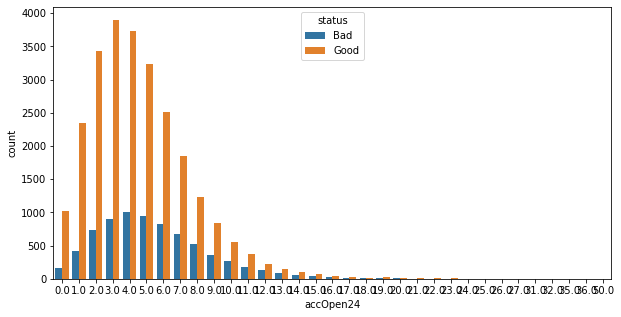

In [26]:
# Visualize the status counts for number of accounts opened in the last 24 months.
plt.figure(figsize=(10, 5))
sns.countplot(x='accOpen24', hue='status', data = loans)

Summary of findings include the following:

* There were 25,747 good loans and 7,379 bad loans.
* More loans were charged off, defaulted or late (31-120 days) during the first 36 months of the loan.
* The primary reason for getting loans was for debt consolidation. 
* The majority of loans (good and bad) had no 30+ day late payments in the last two years. Loans that did have 30+ day late payments usually only had 1 or 2 late payments.
* Initially the number of bad loans increased as the risk went higher (A to C) and then decreased as the credit risk increased.  
* The number of bad loans decreased as the years of employment went longer (from 1 to 9 years) and then increased when length of employment went over 10 years.      
* The number of bad loans decreased over time when the number of credit checks in the past 6 months went down.
* Initially the number of loans increased as the number of accounts opened in the last 24 months went up to 4 and then steadly decreased as the number of accounts opened in the last 24 months went down.   

In [27]:
# Change values for status to numeric.                    
loans['status'].replace({"Bad":"0"},inplace = True)
loans['status'].replace({"Good":"1"},inplace = True)
loans['status'] = loans['status'].astype('int64')

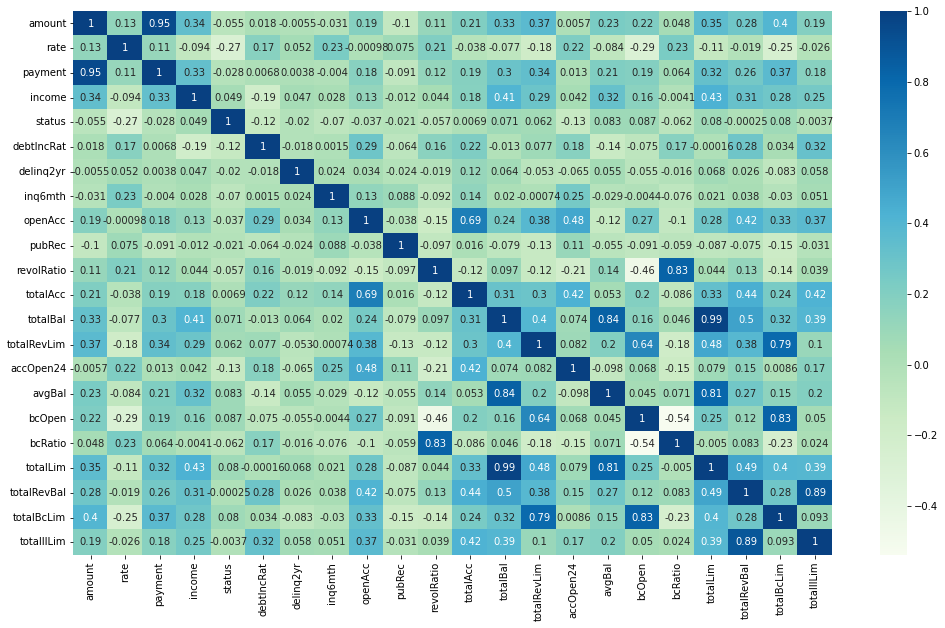

In [28]:
# Generate and display correlation matrix. We will use the Pearson Correlation method.
corr = loans.corr()
plt.figure(figsize = (17,10))
sns.heatmap(corr, annot = True, cmap = 'GnBu')

Only a few features correlate with status more than .05. These include totalBal, totalRevLim, avgBal, bcOpen, totalLim, totalBcLim.


In [ ]:
# Data Processing and Cleaning

In [29]:
# Convert all the non-numeric features to numerical data types.
for column in loans.columns:
   if loans[column].dtype == np.number:
      continue
   loans[column] = LabelEncoder().fit_transform(loans[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
# View the updated data set. 
loans.head(5)

,amount,term,rate,payment,grade,length,home,income,status,reason,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,8000.0,0,0.14,272.07,2,0,2,49966.0,0,0,30.05,0.0,0.0,11.0,0.0,0.55,15.0,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,11000.0,0,0.10,354.89,1,1,0,50000.0,1,1,8.74,0.0,2.0,12.0,0.0,0.36,15.0,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
3,20000.0,1,0.12,447.83,2,0,0,60000.0,1,1,14.14,0.0,0.0,12.0,3.0,0.01,48.0,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
5,10000.0,0,0.14,340.13,2,4,2,108000.0,0,0,11.70,0.0,2.0,25.0,0.0,0.41,44.0,25139.0,57100.0,8.0,1093.0,4129.0,77.8,70672.0,25139.0,18600.0,13572.0
6,20000.0,1,0.13,458.45,2,3,2,40000.0,1,0,23.10,0.0,0.0,13.0,0.0,0.88,31.0,79696.0,20000.0,2.0,6130.0,957.0,94.8,93909.0,79696.0,18500.0,73909.0


In [31]:
# Split the data into training and test data sets.
# First we need to divide our data into x values (the data we will use to make predictions) 
# and y values (the data we are attempting to predict).

x_data = loans.drop('status', axis = 1) 
y_data = loans['status']

In [32]:
# Use train_test_split function to generate training data and test data. Test data set is 30% of original data set. 
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.35, random_state=42)

In [33]:
# Normalize the feature datasets. StandardScaler will transform the data so that its distribution 
# will have a mean value 0 and standard deviation of 1. 
sc = StandardScaler()
x_training_data = sc.fit_transform(x_training_data)
x_test_data = sc.fit_transform(x_test_data)

**Logistic Regression Model**

In [34]:
# Create an instance of the classifier and assign it to a model variable. 
model_lg = LogisticRegression()

In [35]:
# Train the model using the fit method and training data. 
model_lg.fit(x_training_data, y_training_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Make predictions on the test data. 
predictions_lr = model_lg.predict(x_test_data)

In [37]:
# Calculate the Accuracy Score.
lg = accuracy_score(y_test_data, predictions_lr)
print(lg)

0.7866321690383786


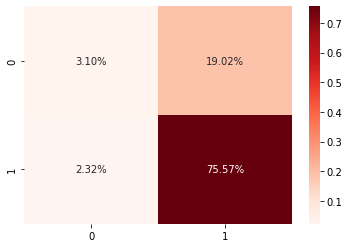

In [38]:
# Show Confusion Maxtrix.
cm1 = confusion_matrix(y_test_data, predictions_lr)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

The logistic regression model correctly predicted 78.67% of the loans  to be good or bad. 

*   3.10% correctly predicted loans to be good.
*   75.57% correctly predicted loans to go bad.

21.34% of the loans were incorrectly predicted to be good or bad.

*   19.02% incorrectly predicted loans to go bad.
*   2.32% incorrectly predicted loans to be good.

**Decision Tree Model**

In [39]:
# Create an instance of the classifier and assign it to a model variable. 
model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state=42)

In [40]:
# Train the Model using the fit method and training data. 
model_dt.fit(x_training_data, y_training_data)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [41]:
# Make predictions on the test data. 
predictions_dt = model_dt.predict(x_test_data)

In [42]:
# Calculate the Accuracy Score.
dt = accuracy_score(y_test_data, predictions_dt)
print(dt)

0.6877102199223804


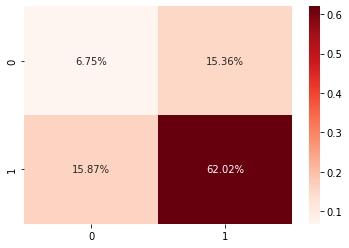

In [43]:
# Show Confusion Maxtrix
cm2 = confusion_matrix(y_test_data, predictions_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

The decision tress model correctly predicted 68.77% of the loans  to be good or bad. 

*   6.75% correctly predicted loans to be good.
*   62.02% correctly predicted loans to go bad.

31.23% of the loans were incorrectly predicted to be good or bad.

*   15.36% incorrectly predicted loans to go bad.
*   15.87% incorrectly predicted loans to be good.

**Random Forrest Model**

In [44]:
# Create an instance of the classifier and assign it to a model variable. 
# model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10)

Parameters are:


*   n_estimators is the number of trees in the forest
*   max_depth is the maximum depth of the tree

In [45]:
# Train the model using the fit method and training data.
model_rf.fit(x_training_data, y_training_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [47]:
# Calculate the Accuracy Score.
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.7836998706338939


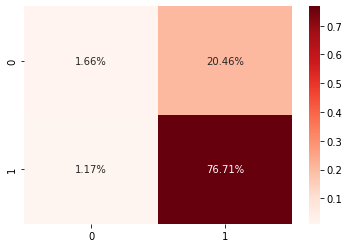

In [48]:
# Show Confusion Maxtrix
cm3 = confusion_matrix(y_test_data, predictions_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

The random forrest model correctly predicted 78.36% of the loans  to be good or bad. 

*   1.66% correctly predicted loans to be good.
*   76.71% correctly predicted loans to go bad.

21.63% of the loans were incorrectly predicted to be good or bad.

*   20.46% incorrectly predicted loans to go bad.
*   1.17% incorrectly predicted loans to be good.

**K Nearest Neighbors**

In [49]:
# Create an instance of the classifier and assign it to a model variable. 
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [50]:
# Train the model using the fit method and training data.
model_kn.fit(x_training_data, y_training_data)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [51]:
# Make predictions on the test data. 
predictions_kn = model_kn.predict(x_test_data)

In [52]:
# Calculate the Accuracy Score.
kn = accuracy_score(y_test_data, predictions_kn)
print(kn)

0.770677015955153


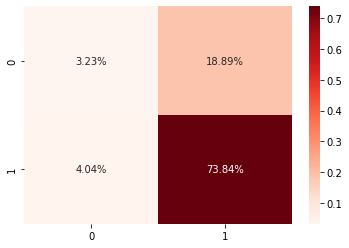

In [53]:
# Show Confusion Maxtrix
cm4 = confusion_matrix(y_test_data, predictions_kn)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

The k nearest neighbors model correctly predicted 77.06% of the loans  to be good or bad. 

*   3.23% correctly predicted loans to be good.
*   73.84% correctly predicted loans to go bad.

22.93% of the loans were incorrectly predicted to be good or bad.

*   18.89% incorrectly predicted loans to go bad.
*   4.04% incorrectly predicted loans to be good.

**Support Vector Machine (SVC)**

In [54]:
# Create an instance of the classifier and assign it to a model variable. 
model_svc = SVC()

In [55]:
# Train the model using the fit method and training data.
model_svc.fit(x_training_data, y_training_data)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
# Make predictions on the test data. 
predictions_svc = model_svc.predict(x_test_data)

In [57]:
# Calculate the Accuracy Score.
svc = accuracy_score(y_test_data, predictions_svc)
print(svc)

0.7831824062095731


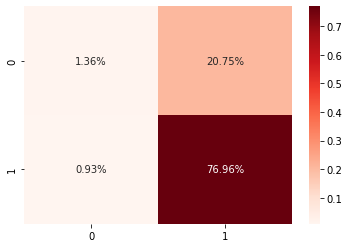

In [58]:
# Show Confusion Maxtrix
cm5 = confusion_matrix(y_test_data, predictions_svc)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

The support vector machine model correctly predicted 78.32% of the loans  to be good or bad. 

*   1.36% correctly predicted loans to be good.
*   76.96% correctly predicted loans to go bad.

21.68% of the loans were incorrectly predicted to be good or bad.

*   20.75% incorrectly predicted loans to go bad.
*   0.93% incorrectly predicted loans to be good.

,Model,Accuracy_score
0,Logistic Regression,0.786632
2,Random Forest,0.783700
4,Support Vector Machine,0.783182
3,KNeighbours,0.770677
1,Decision Tree,0.687710


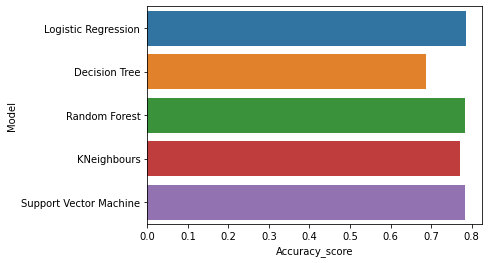

In [60]:
# Show Accuraccy Score by Model.
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNeighbours', 'Support Vector Machine'],
    'Accuracy_score' :[lg, dt, rf, kn, svc]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Conclusions: The logistic regression model had the highest accuracy score. This model correctly predicted 79% of the loans to be good or bad. 3.10% of loans were correctly predicted to be good and 75.57% of loans were correctly predicted to go bad. "Good" loans were classified as Fully Paid, In Grace Period or Late by (16-30 days). "Bad" loans were classified as Charged Off, Default or Late by (31-120 days). The models used in this analysis were better at predicting bad loans versus predicting good loans.  

The features with the highest correlation to loan status were total current balance of all credit accounts, average balance per account, total unused credit on credit cards and total credit limits of credit cards. The employment variable may have been a good feature for predicting loan status if the category values were more specific to the type of employment.
 
The models may be improved by having a more balanced datset between good and bad loans. Also tuning some of the models hyper parameters may increase accuracy.  


